In [15]:
#The relationship between r and level
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

X=[0,1,5]
Y=[1,1.15,1.4]

# alias data to match previous example
xData = numpy.array(X, dtype=float)
yData = numpy.array(Y, dtype=float)

def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
modelPredictions = func(xData, *fittedParameters) 
absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE

Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
print()
print(0.236*numpy.log(4+1.129)+0.971)
#Parameters: [0.23640191 1.12853736 0.97141371]
#Function：r=0.23640191*ln(x+1.12853736)+0.97141371

Parameters: [0.23640191 1.12853736 0.97141371]
RMSE: 0.0
R-squared: 1.0



In [61]:
#Basic Functions
import matplotlib.pyplot as plt
def cal_ab(a,b):
    return (1-a)/(1-a+b)
def cal_profit(a,b,Z,expected,D,real):
    cost=50
    sell=100*(1-a)
    reback=100*b
    E=expected
    D=D
    voucher=E+D*Z
    #print(voucher)
    if(real>voucher):
        profit=(sell-cost)*voucher+(real-voucher)*50
    else:
        profit=real*(sell-cost)+(voucher-real)*reback
    return profit
def cal_union(a,b,Z,expected,D,real):
    cost=50
    sell=100*(1-a)
    reback=100*b
    E=expected
    D=D
    voucher=E+D*Z
    if(real<voucher):
        profit=-(voucher-real)*100*b
        return profit
    else:
        return 0
def cal_D(a,b,Z,expected,real):
    D=0
    cost=50
    sell=100*(1-a)
    reback=100*b
    if(real<expected):
        voucher=(50000-real*(sell-cost))/reback+real
        D=(voucher-expected)/Z
    return D
def cal_league_price(expected):
    profit_rs=cal_profit(0.05,0.15,1.1,expected,166.67,expected)
    union_rs=cal_union(0.05,0.15,1.1,expected,166.67,expected)
    Merchant_profit=profit_rs-50000-2.5*expected
    Alliance_profit=union_rs+2.5*expected
    return [Merchant_profit,Alliance_profit]
def cal_mv(a,expected,real):
    profit=0
    if(expected>real):
        profit=(50-100*a)*real
    else:
        profit=(50-100*a)*expected+50*(real-expected)
    return profit
def cal_AQE(a,level):
    profit=0
    voucher=400*level
    profit=50000+a*voucher*100
    return profit

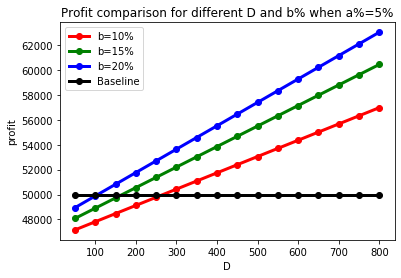

In [51]:
#Test case 1
#Profit of different D and the same a,b
import matplotlib.pyplot as plt
import pandas as pd
D=[]
p_b_1=[]
p_b_15=[]
p_b_2=[]
for i in range(50,850,50):
    D.append(i)
    p_b_1.append(cal_profit(0.05,0.1,1.31,1150,i,1000))
    p_b_15.append(cal_profit(0.05,0.15,1.1,1150,i,1000))
    p_b_2.append(cal_profit(0.05,0.2,0.94,1150,i,1000))
plt.title("Profit comparison for different D and b% when a%=5%")
plt.xlabel("D")
plt.ylabel("profit")
plt.plot(D,p_b_1,label='b=10%', linewidth=3, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(D,p_b_15,label='b=15%', linewidth=3, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(D,p_b_2,label='b=20%', linewidth=3, color='b', marker='o',
         markerfacecolor='b',)
plt.plot(D,cons,label='Baseline', linewidth=3, color='black', marker='o')
plt.legend()
plt.show()

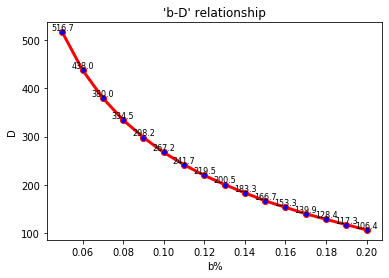

In [77]:
#Text case 2
#Relationship between b and D
bs=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
abs=[1.645,1.56,1.485,1.42,1.36,1.31,1.26,1.215,1.17,1.13,1.1,1.06,1.03,0.995,0.965,0.94]
Ds=[]
for j in range(16):
    D0=round(cal_D(0.05,bs[j],abs[j],1150,1000),1)
    Ds.append(D0)
plt.title("'b-D' relationship")
plt.xlabel("b%")
plt.ylabel("D")
plt.plot(bs,Ds,label='weight changes', linewidth=3, color='r', marker='o',
         markerfacecolor='blue',)
for a, b in zip(bs,Ds):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

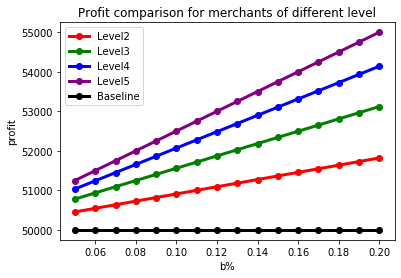

In [50]:
#Text case 3
import matplotlib.pyplot as plt
#Profits of merchants in different levels and b when a =5%
bs=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
abs=[1.645,1.56,1.485,1.42,1.36,1.31,1.26,1.215,1.17,1.13,1.1,1.06,1.03,0.995,0.965,0.94]
profits2=[]
profits3=[]
profits4=[]
profits5=[]
for j in range(16):
    D0=round(cal_D(0.05,bs[j],abs[j],1150,1000),1)
    Ds.append(D0)
    profits2.append(round(cal_profit(0.05,bs[j],abs[j],1241,D0,1000),1))
    profits3.append(round(cal_profit(0.05,bs[j],abs[j],1306,D0,1000),1))
    profits4.append(round(cal_profit(0.05,bs[j],abs[j],1357,D0,1000),1))
    profits5.append(round(cal_profit(0.05,bs[j],abs[j],1400,D0,1000),1))
plt.title("Profit comparison for merchants of different level")
plt.xlabel("b%")
plt.ylabel("profit")
plt.plot(bs,profits2,label='Level2', linewidth=3, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(bs,profits3,label='Level3', linewidth=3, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(bs,profits4,label='Level4', linewidth=3, color='b', marker='o',
         markerfacecolor='b',)
plt.plot(bs,profits5,label='Level5', linewidth=3, color='purple', marker='o',
         markerfacecolor='purple',)
plt.plot(bs,cons,label='Baseline', linewidth=3, color='black', marker='o')
plt.legend()

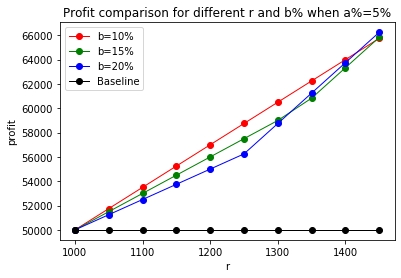

In [63]:
#Test case 3
#Profit comparison for different r and b% when a%=5%
R=[]
p_r_1=[]
p_r_15=[]
p_r_2=[]
for r in range(1000,1500,50):
    R.append(r)
    p1=cal_D(0.05,0.1,1.31,1150,1000)
    p_r_1.append(cal_profit(0.05,0.1,1.31,1150,p1,r))
    p2=cal_D(0.05,0.15,1.1,1150,1000)
    p_r_15.append(cal_profit(0.05,0.15,1.1,1150,p2,r))
    p3=cal_D(0.05,0.2,0.94,1150,1000)
    p_r_2.append(cal_profit(0.05,0.2,0.94,1150,p3,r))
plt.title("Profit comparison for different r and b% when a%=5%")
plt.xlabel("r")
plt.ylabel("profit")
plt.plot(R,p_r_1,label='b=10%', linewidth=1, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(R,p_r_15,label='b=15%', linewidth=1, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(R,p_r_2,label='b=20%', linewidth=1, color='b', marker='o',
         markerfacecolor='b',)
plt.plot(R,cons_r,label='Baseline', linewidth=1, color='black', marker='o')
plt.legend()
plt.show()

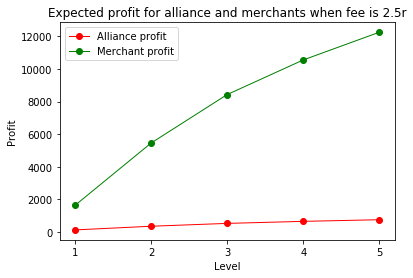

In [64]:
#Test case 4
#Expected profit for alliance and merchants
import numpy as np
alliance=[]
merchant=[]
#Level 1
t1=cal_league_price(1150)
merchant.append(t1[0])
alliance.append(t1[1])
#Level 2
t2=cal_league_price(1240)
merchant.append(t2[0])
alliance.append(t2[1])
#Level 3
t3=cal_league_price(1310)
merchant.append(t3[0])
alliance.append(t3[1])
#Level 4
t4=cal_league_price(1360)
merchant.append(t4[0])
alliance.append(t4[1])
#Level 5
t5=cal_league_price(1400)
merchant.append(t5[0])
alliance.append(t5[1])
plt.title("Expected profit for alliance and merchants")
plt.xlabel("Level")
plt.ylabel("Profit")
levels=[1,2,3,4,5]
plt.plot(levels,alliance,label='Alliance profit', linewidth=1, color='r', marker='o',)
plt.xticks(np.arange(1, 6, 1))
plt.plot(levels,merchant,label='Merchant profit', linewidth=1, color='g', marker='o',)
plt.xticks(np.arange(1, 6, 1))
plt.legend()

plt.show()

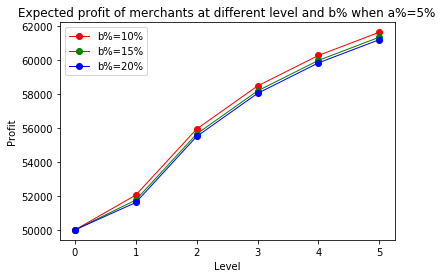

In [73]:
#Text case 5
#Expected profit of merchants at different level and b% when a%=5%
levels=[0,1,2,3,4,5]
b_10_profits=[]
b_15_profits=[]
b_20_profits=[]
expectation=[1000,1150,1241,1306,1357,1400]
#Level0
b_10_profits.append(50000)
b_15_profits.append(50000)
b_20_profits.append(50000)

#Level1
b_10_profits.append(cal_profit(0.05,0.1,1.31,1150,cal_D(0.05,0.1,1.31,1150,1150),1150)-0.5*1150)
b_15_profits.append(round(cal_profit(0.05,0.15,1.1,1150,cal_D(0.05,0.15,1.1,1150,1150),1150)-0.5*1150,1))
b_20_profits.append(round(cal_profit(0.05,0.20,0.94,1150,cal_D(0.05,0.20,0.94,1150,1150),1150)-0.5*1150,1))

#Level2
b_10_profits.append(round(cal_profit(0.05,0.1,1.31,1241,cal_D(0.05,0.1,1.31,1241,1150),1241)-1*1241,1))
b_15_profits.append(round(cal_profit(0.05,0.15,1.1,1241,cal_D(0.05,0.15,1.1,1241,1150),1241)-1*1241,1))
b_20_profits.append(round(cal_profit(0.05,0.20,0.94,1241,cal_D(0.05,0.20,0.94,1241,1150),1241)-1*1241,1))

#Level3
b_10_profits.append(round(cal_profit(0.05,0.1,1.31,1306,cal_D(0.05,0.1,1.31,1306,1150),1306)-1.5*1306,1))
b_15_profits.append(round(cal_profit(0.05,0.15,1.1,1306,cal_D(0.05,0.15,1.1,1306,1150),1306)-1.5*1306,1))
b_20_profits.append(round(cal_profit(0.05,0.20,0.94,1306,cal_D(0.05,0.20,0.94,1306,1150),1306)-1.5*1306,1))

#Level4
b_10_profits.append(round(cal_profit(0.05,0.1,1.31,1357,cal_D(0.05,0.1,1.31,1357,1150),1357)-2*1357,1))
b_15_profits.append(round(cal_profit(0.05,0.15,1.1,1357,cal_D(0.05,0.15,1.1,1357,1150),1357)-2*1357,1))
b_20_profits.append(round(cal_profit(0.05,0.20,0.94,1357,cal_D(0.05,0.20,0.94,1357,1150),1357)-2*1357,1))

#Level5
b_10_profits.append(cal_profit(0.05,0.1,1.31,1400,cal_D(0.05,0.1,1.31,1400,1150),1400)-2.5*1400)
b_15_profits.append(cal_profit(0.05,0.15,1.1,1400,cal_D(0.05,0.15,1.1,1400,1150),1400)-2.5*1400)
b_20_profits.append(cal_profit(0.05,0.20,0.94,1400,cal_D(0.05,0.20,0.94,1400,1150),1400)-2.5*1400)


#画图
plt.title("Expected profit of merchants at different level and b% when a%=5%")
plt.xlabel("Level")
plt.ylabel("Profit")
plt.plot(levels,b_10_profits,label='b%=10%', linewidth=1, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(levels,b_15_profits,label='b%=15%', linewidth=1, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(levels,b_20_profits,label='b%=20%', linewidth=1, color='b', marker='o',
         markerfacecolor='b',)
plt.legend()

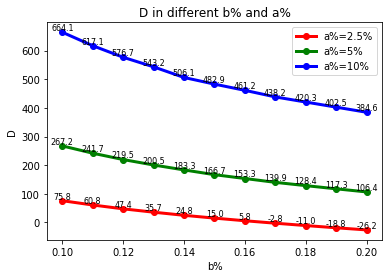

In [74]:
#Text case 6
#D in different b% and a%
import matplotlib.pyplot as plt
bs_10=[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
Ds_10=[]
Ds_25=[]
Ds_5=[]
#Calculate D in different b when a=0.05,0.025 and 0.1.
for d in range(0,11):
    D0=round(cal_D(0.05,bs_10[d],abs_5[d],1150,1000),1)
    Ds_5.append(D0)
for d in range(0,11):
    D1=round(cal_D(0.1,bs_10[d],abs_10[d],1150,1000),1)
    Ds_10.append(D1)
for d in range(0,11):
    D2=round(cal_D(0.025,bs_10[d],abs_25[d],1150,1000),1)
    Ds_25.append(D2)
#The profit of merchants in defferent levels and b when a=5%
plt.title("D in different b% and a%")
plt.xlabel("b%")
plt.ylabel("D")
plt.plot(bs_10,Ds_25,label='a%=2.5%', linewidth=3, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(bs_10,Ds_5,label='a%=5%', linewidth=3, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(bs_10,Ds_10,label='a%=10%', linewidth=3, color='b', marker='o',
         markerfacecolor='b',)
for e, f in zip(bs_10,Ds_25):
    plt.text(e, f, f, ha='center', va='bottom', fontsize=8)
for g, h in zip(bs_10,Ds_5):
    plt.text(g, h, h, ha='center', va='bottom', fontsize=8)
for i, j in zip(bs_10,Ds_10):
    plt.text(i, j, j, ha='center', va='bottom', fontsize=8)
plt.legend()

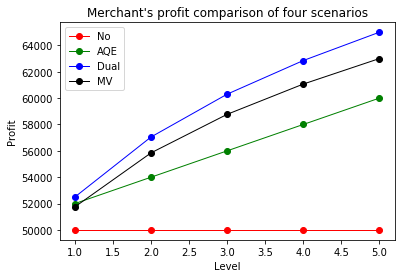

In [31]:
#Test Case 7
#Merchant profit
levels=[1,2,3,4,5]
AQE=[]
MV=[]
NO=[]
DUAL=[]
#Level 1:
NO.append(50000)#The profit of no incentive one.
MV.append(cal_mv(0.05,1150,1150))#The profit of mv.
AQE.append(cal_AQE(0.05,1))#The profit of AQE.
DUAL.append(round(cal_profit(0.05,0.1,1.31,1000,cal_D(0.05,0.1,1.31,1000,1150),1150),1))#The profit of Dual incentives one.
#Level 2:
NO.append(50000)
MV.append(cal_mv(0.05,1241,1241))
AQE.append(cal_AQE(0.05,2))
DUAL.append(round(cal_profit(0.05,0.1,1.31,1000,cal_D(0.05,0.1,1.31,1241,1241),1241),1))
#Level 3:
NO.append(50000)
MV.append(cal_mv(0.05,1306,1306))
AQE.append(cal_AQE(0.05,3))
DUAL.append(round(cal_profit(0.05,0.1,1.31,1000,cal_D(0.05,0.1,1.31,1306,1306),1306),1))
#Level 4:
NO.append(50000)
MV.append(cal_mv(0.05,1357,1357))
AQE.append(cal_AQE(0.05,4))
DUAL.append(round(cal_profit(0.05,0.1,1.31,1000,cal_D(0.05,0.1,1.31,1357,1357),1357),1))
#Level 5:
NO.append(50000)
MV.append(cal_mv(0.05,1400,1400))
AQE.append(cal_AQE(0.05,5))
DUAL.append(round(cal_profit(0.05,0.1,1.31,1000,cal_D(0.05,0.1,1.31,1400,1400),1400),1))
#Draw
plt.title("Merchant's profit comparison of four scenarios")
plt.xlabel("Level")
plt.ylabel("Profit")
plt.plot(levels,NO,label='No', linewidth=1, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(levels,AQE,label='AQE', linewidth=1, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(levels,DUAL,label='Dual', linewidth=1, color='b', marker='o',
         markerfacecolor='b',)
plt.plot(levels,MV,label='MV', linewidth=1, color='black', marker='o',
         markerfacecolor='black',)
plt.legend()

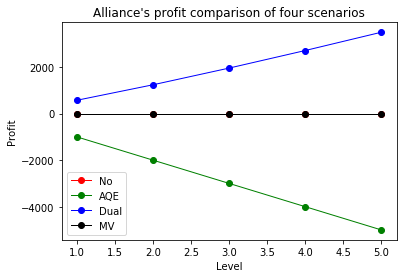

In [34]:
#Test case 7:
#Alliance profit
def cal_dual_alliance(level,expected):
    return level*0.5*expected
def cal_AQE_alliance(a,level):
    return -200*level*a*100
levels=[1,2,3,4,5]
AQE=[]
MV=[]
NO=[]
DUAL=[]
#Level 1:
NO.append(0)#The profit of no incentive one.
MV.append(0)#The profit of mv.
AQE.append(cal_AQE_alliance(0.05,1))#The profit of AQE.
DUAL.append(cal_dual_alliance(1,1150))#The profit of Dual incentives one.
#Level 2:
NO.append(0)
MV.append(0)
AQE.append(cal_AQE_alliance(0.05,2))
DUAL.append(cal_dual_alliance(2,1241))
#Level 3:
NO.append(0)
MV.append(0)
AQE.append(cal_AQE_alliance(0.05,3))
DUAL.append(cal_dual_alliance(3,1306))
#Level 4:
NO.append(0)
MV.append(0)
AQE.append(cal_AQE_alliance(0.05,4))
DUAL.append(cal_dual_alliance(4,1357))
#Level 5:
NO.append(0)
MV.append(0)
AQE.append(cal_AQE_alliance(0.05,5))
DUAL.append(cal_dual_alliance(5,1400))
#Draw
plt.title("Alliance's profit comparison of four scenarios")
plt.xlabel("Level")
plt.ylabel("Profit")
plt.plot(levels,NO,label='No', linewidth=1, color='r', marker='o',
         markerfacecolor='r',)
plt.plot(levels,AQE,label='AQE', linewidth=1, color='g', marker='o',
         markerfacecolor='g',)
plt.plot(levels,DUAL,label='Dual', linewidth=1, color='b', marker='o',
         markerfacecolor='b',)
plt.plot(levels,MV,label='MV', linewidth=1, color='black', marker='o',
         markerfacecolor='black',)
plt.legend()